<a href="https://colab.research.google.com/github/Meidyt/DA/blob/main/EDA(Soal1-11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tes Digital Talent
Meidy Tataluckyta - 21240-0000070

### Import Library dan dataset

In [161]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas

In [162]:
df_status =  pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_status.csv', sep =",")
df_population =  pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_population.csv', sep =",")
df_service =  pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_services.csv', sep =",")
df_location = pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_location.csv', sep =",")
df_demography = pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_demographics.csv', sep =",")

### Data Preprocessing

In [180]:
df_status["Churn_Label"] = df_status["Churn_Label"].map({"Yes":1,"No":0}) 
df_status.head()

,Customer_ID,Count,Quarter,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Category,Churn_Reason
0,8779-QRDMV,1,Q3,3,Churned,NaN,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,NaN,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,NaN,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,NaN,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,NaN,1,67,2793,Price,Extra data charges


In [181]:
df_status = df_status[df_status.Churn_Label!= 0]
df_status.describe()

,Count,Satisfaction_Score,Churn_Label,Churn_Value,Churn_Score,CLTV
count,1869.0,1869.000000,0.0,1869.0,1869.000000,1869.000000
mean,1.0,1.736223,NaN,1.0,81.777956,4149.414660
std,0.0,0.808466,NaN,0.0,9.166870,1189.370707
min,1.0,1.000000,NaN,1.0,65.000000,2003.000000
25%,1.0,1.000000,NaN,1.0,74.000000,3101.000000
50%,1.0,2.000000,NaN,1.0,83.000000,4238.000000
75%,1.0,2.000000,NaN,1.0,90.000000,5166.000000
max,1.0,3.000000,NaN,1.0,96.000000,6484.000000


In [182]:
dfpopulationnloc = df_population.merge(df_location, on=['Zip_Code'], how='inner')
dfpopulationnloc.describe()

,ID,Zip_Code,Population,Count,Latitude,Longitude
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000
mean,784.800653,93486.070567,22139.603294,1.0,36.197455,-119.756684
std,489.044050,1856.767505,21152.392837,0.0,2.468929,2.154425
min,1.000000,90001.000000,11.000000,1.0,32.555828,-124.301372
25%,353.000000,92101.000000,2344.000000,1.0,33.990646,-121.788090
50%,759.000000,93518.000000,17554.000000,1.0,36.205465,-119.595293
75%,1208.000000,95329.000000,36125.000000,1.0,38.161321,-117.969795
max,1670.000000,96150.000000,105285.000000,1.0,41.962127,-114.192901


In [183]:
dfdemography = df_demography.merge(df_status, on=['Customer_ID','Count'], how='inner')
dfdemography.describe()

,Count,Age,Number_of_Dependents,Satisfaction_Score,Churn_Label,Churn_Value,Churn_Score,CLTV
count,1869.0,1869.000000,1869.000000,1869.000000,0.0,1869.0,1869.000000,1869.000000
mean,1.0,49.735688,0.118245,1.736223,NaN,1.0,81.777956,4149.414660
std,0.0,17.604893,0.549902,0.808466,NaN,0.0,9.166870,1189.370707
min,1.0,19.000000,0.000000,1.000000,NaN,1.0,65.000000,2003.000000
25%,1.0,35.000000,0.000000,1.000000,NaN,1.0,74.000000,3101.000000
50%,1.0,50.000000,0.000000,2.000000,NaN,1.0,83.000000,4238.000000
75%,1.0,65.000000,0.000000,2.000000,NaN,1.0,90.000000,5166.000000
max,1.0,80.000000,7.000000,3.000000,NaN,1.0,96.000000,6484.000000


In [184]:
dflocation = df_location.merge(df_status, on=['Customer_ID','Count'], how='inner')
dflocation.describe()

,Count,Zip_Code,Latitude,Longitude,Satisfaction_Score,Churn_Label,Churn_Value,Churn_Score,CLTV
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,0.0,1869.0,1869.000000,1869.000000
mean,1.0,93435.752809,36.026801,-119.670474,1.736223,NaN,1.0,81.777956,4149.414660
std,0.0,1823.231029,2.497264,2.149758,0.808466,NaN,0.0,9.166870,1189.370707
min,1.0,90001.000000,32.555828,-124.301372,1.000000,NaN,1.0,65.000000,2003.000000
25%,1.0,92117.000000,33.890046,-121.719489,1.000000,NaN,1.0,74.000000,3101.000000
50%,1.0,93292.000000,35.490705,-119.285484,2.000000,NaN,1.0,83.000000,4238.000000
75%,1.0,95258.000000,38.055562,-117.810896,2.000000,NaN,1.0,90.000000,5166.000000
max,1.0,96150.000000,41.962127,-115.191857,3.000000,NaN,1.0,96.000000,6484.000000


In [185]:
dfservice = df_service.merge(df_status, on=['Customer_ID'], how='inner')
dfservice.describe()

,Count_x,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly_Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total_revenue,Count_y,Satisfaction_Score,Churn_Label,Churn_Value,Churn_Score,CLTV
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0,1869.000000,0.0,1869.0,1869.000000,1869.000000
mean,1.0,0.521134,17.979133,23.167635,22.175495,74.441332,1531.796094,1.518983,7.158909,433.917549,1971.353569,1.0,1.736223,NaN,1.0,81.777956,4149.414660
std,0.0,1.094667,19.531123,15.409464,18.309123,24.666053,1890.822994,7.041632,24.857342,650.358302,2438.441813,0.0,0.808466,NaN,0.0,9.166870,1189.370707
min,1.0,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,0.000000,0.000000,0.000000,21.610000,1.0,1.000000,NaN,1.0,65.000000,2003.000000
25%,1.0,0.000000,2.000000,9.500000,9.000000,56.150000,134.500000,0.000000,0.000000,31.160000,175.850000,1.0,1.000000,NaN,1.0,74.000000,3101.000000
50%,1.0,0.000000,10.000000,22.880000,19.000000,79.650000,703.550000,0.000000,0.000000,139.080000,893.550000,1.0,2.000000,NaN,1.0,83.000000,4238.000000
75%,1.0,1.000000,29.000000,36.360000,27.000000,94.200000,2331.300000,0.000000,0.000000,527.940000,2888.760000,1.0,2.000000,NaN,1.0,90.000000,5166.000000
max,1.0,9.000000,72.000000,49.980000,85.000000,118.350000,8684.800000,49.570000,150.000000,3508.820000,11195.440000,1.0,3.000000,NaN,1.0,96.000000,6484.000000


### Soal no 1 - Kota dengan pelanggan churn terbanyak

In [186]:
print(dflocation.City.value_counts())

San Diego                 185
Los Angeles                78
San Francisco              31
San Jose                   29
Sacramento                 26
                         ... 
Lebec                       1
Prather                     1
Los Osos                    1
Rancho Santa Margarita      1
Mojave                      1
Name: City, Length: 777, dtype: int64


### Soal no 2 - Umur rata-rata pelanggan churn

In [187]:
df_Age_numb=dfdemography.groupby("Age")["Age"].count()
df_Age_numb.sort_values(ascending=False)

Age
44    41
47    41
53    41
68    40
39    39
      ..
43    22
45    20
24    18
19    18
72    15
Name: Age, Length: 62, dtype: int64

### Soal no 3- Pelanggan churn berjenis kelamin laki-laki

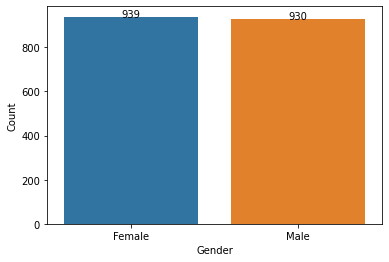

In [188]:
Genderchart = dfdemography.groupby('Gender').sum().reset_index()
g =sns.barplot(x='Gender',y='Count',data=Genderchart)

for index, row in Genderchart.iterrows():
    g.text(row.name,row.Count, round(row.Count,2), color='black', ha="center")

### Soal no 4 - Jenis senior citizen pelanggan churn

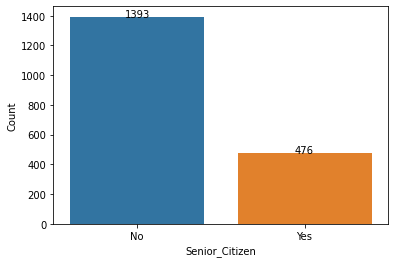

In [189]:
scchart = dfdemography.groupby('Senior_Citizen').sum().reset_index()
g =sns.barplot(x='Senior_Citizen',y='Count',data=scchart)

for index, row in scchart.iterrows():
    g.text(row.name,row.Count, round(row.Count,2), color='black', ha="center")

### Soal no 5-Kota dengan populasi terbanyak

In [190]:
dfpopulationnloc.max()

ID                               1670
Zip_Code                        96150
Population                     105285
Customer_ID                9995-HOTOH
Count                               1
Country                 United States
State                      California
City                            Zenia
Lat Long       41.962127, -122.527696
Latitude                      41.9621
Longitude                    -114.193
dtype: object

### Soal 6- Pelanggan dengan Revenue terbanyak

In [191]:
df_service.max()

Customer_ID                            9995-HOTOH
Count                                           1
Quarter                                        Q3
Referred a Friend                             Yes
Number of Referrals                            11
Tenure in Months                               72
Offer                                     Offer E
Phone Service                                 Yes
Avg Monthly Long Distance Charges           49.99
Multiple Lines                                Yes
Internet Service                              Yes
Internet Type                                None
Avg Monthly GB Download                        85
Online Security                               Yes
Online Backup                                 Yes
Device Protection Plan                        Yes
Premium Tech Support                          Yes
Streaming TV                                  Yes
Streaming Movies                              Yes
Streaming Music                               Yes


### Soal no 7-Alasan paling banyak digunakan pelanggan churn

In [179]:
print(df_status.Churn_Reason.value_counts())

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn_Reason, 

### Soal No 8-Rata-rata nilai kepuasan pelanggan churn

In [192]:
print(df_status.Satisfaction_Score.value_counts())
print("Rata-rata nilai kepuasan adalah", df_status.Satisfaction_Score.mean())

1    922
2    518
3    429
Name: Satisfaction_Score, dtype: int64
Rata-rata nilai kepuasan adalah 1.736222578919208


### Soal No 9-Jenis contract yang digunakan oleh pelanggan churn 

In [193]:
print(df_service.Contract.value_counts())

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64


### Soal No 10-Nilai tengah dari biaya bulanan para pelanggan churn 

In [194]:
print(df_service.Monthly_Charge.describe())
print("Nilai tengah dari biaya bulanan para pelanggan churn adalah", df_service.Monthly_Charge.median())

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly_Charge, dtype: float64
Nilai tengah dari biaya bulanan para pelanggan churn adalah 70.35


### Soal No 11-Visualisai sebaran populasi churn pada tiap kota

In [195]:
!pip install pandas folium

In [196]:
import pandas as pd
import geopandas as gpd
import math
from folium import Map
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster


In [197]:
!pip install geopandas

In [209]:
for_map=dflocation

In [210]:
# Create the map
mapping = Map(location=[34.424926, -117.184503], tiles='cartodbpositron', zoom_start=8,)

# Add points to the map
mc = MarkerCluster()
for idx, row in for_map.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
mapping.add_child(mc)

# Display the map
mapping
